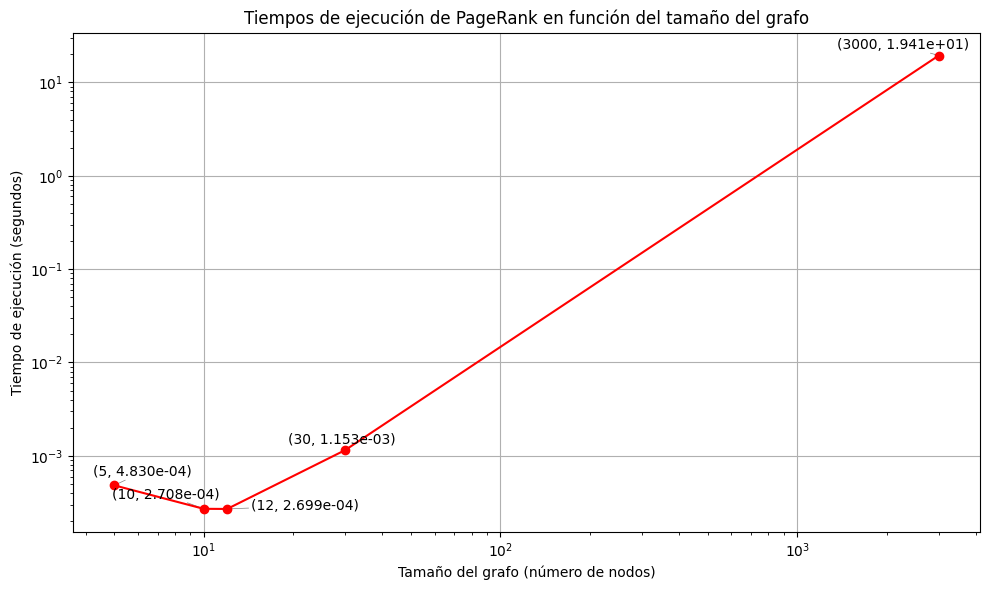

In [1]:
import matplotlib.pyplot as plt
import time 
from funciones import *
from adjustText import adjust_text

def medir_tiempo_ejecucion(W, p):
    start_time = time.time()
    calcularRanking(W, p)
    end_time = time.time()
    return end_time - start_time

    
# pongo todos los grafos juntos 
archivos_grafos = ['./tests/test_aleatorio.txt','./tests/mathworld_grafo.txt' , './tests/test_dosestrellas.txt', './tests/instagram_famosos_grafo.txt', './tests/test_30_segundos.txt']  # Reemplaza con los nombres de tus archivos de grafo
parametro_p = 0.85 

# me armo lista svacias para pondes despues lo datos que me genere y asi poder graficarlos 
tiempos_ejecucion = []
tamanos_grafos = []

for archivo_grafo in archivos_grafos:
    
    W = leer_archivo(archivo_grafo)
    
    tiempo = medir_tiempo_ejecucion(W, parametro_p)
    
    tiempos_ejecucion.append(tiempo)
    tamanos_grafos.append(W.shape[0]) 

plt.figure(figsize=(10, 6))
plt.loglog(tamanos_grafos, tiempos_ejecucion, marker='o', linestyle='-', color='red')
plt.title('Tiempos de ejecución de PageRank en función del tamaño del grafo')
plt.xlabel('Tamaño del grafo (número de nodos)')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.grid(True)

# Add labels to each point with scientific notation
texts = []
for i, (x, y) in enumerate(zip(tamanos_grafos, tiempos_ejecucion)):
    texts.append(plt.text(x, y, f'({x}, {y:.3e})', ha='center', va='bottom'))

# Adjust text labels to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle="", color='gray', lw=0.5))

plt.tight_layout()
plt.show()